In [ ]:
%matplotlib inline
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import sys
import os
from __future__ import division
plt.rcParams["figure.figsize"] = (20,10)
from itertools import chain
import tqdm as tqdm
from colorthief import ColorThief

warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [ ]:
!pip install colorthief

In [ ]:
import pandas as pd
import io
import requests

url = "https://github.com/dimgold/pycon_social_networkx/blob/master/ESC2018_GF.xlsx?raw=true"
r = requests.get(url)
votes_data = pd.read_excel(io.BytesIO(r.content), sheet_name='Combined result', skiprows = 1)

print(votes_data.shape)
votes_data.head(5)

(26, 47)


,Rank,Running order,Country,Total,Albania,Austria,Belarus,Belgium,Croatia,Cyprus,...,Hungary,Moldova,Armenia,Czech Republic,Georgia,Montenegro,Azerbaijan,San Marino,Italy,Australia
0,1,22,Israel,529,6,19,8,16,16,10,...,16,22,18,22,15,1,13,24,9,18
1,2,25,Cyprus,436,20,1,15,11,8,0,...,7,13,19,8,10,6,14,7,8,7
2,3,5,Austria,342,2,0,10,15,0,2,...,11,3,7,5,9,0,0,0,7,5
3,4,11,Germany,340,14,16,0,7,3,3,...,1,8,5,3,7,0,5,14,13,12
4,5,26,Italy,308,24,10,4,6,10,15,...,6,8,3,2,5,12,5,12,0,0


In [ ]:
votes_melted = votes_data.melt(
    ['Rank','Running order','Country','Total'],
    var_name = 'Source Country',value_name='points')

votes_melted.head()

,Rank,Running order,Country,Total,Source Country,points
0,1,22,Israel,529,Albania,6
1,2,25,Cyprus,436,Albania,20
2,3,5,Austria,342,Albania,2
3,4,11,Germany,340,Albania,14
4,5,26,Italy,308,Albania,24


In [ ]:
G = nx.from_pandas_edgelist(votes_melted,
                            source='Source Country',
                            target='Country',
                            edge_attr='points',
                            create_using=nx.DiGraph())

print(G)

DiGraph with 43 nodes and 1118 edges


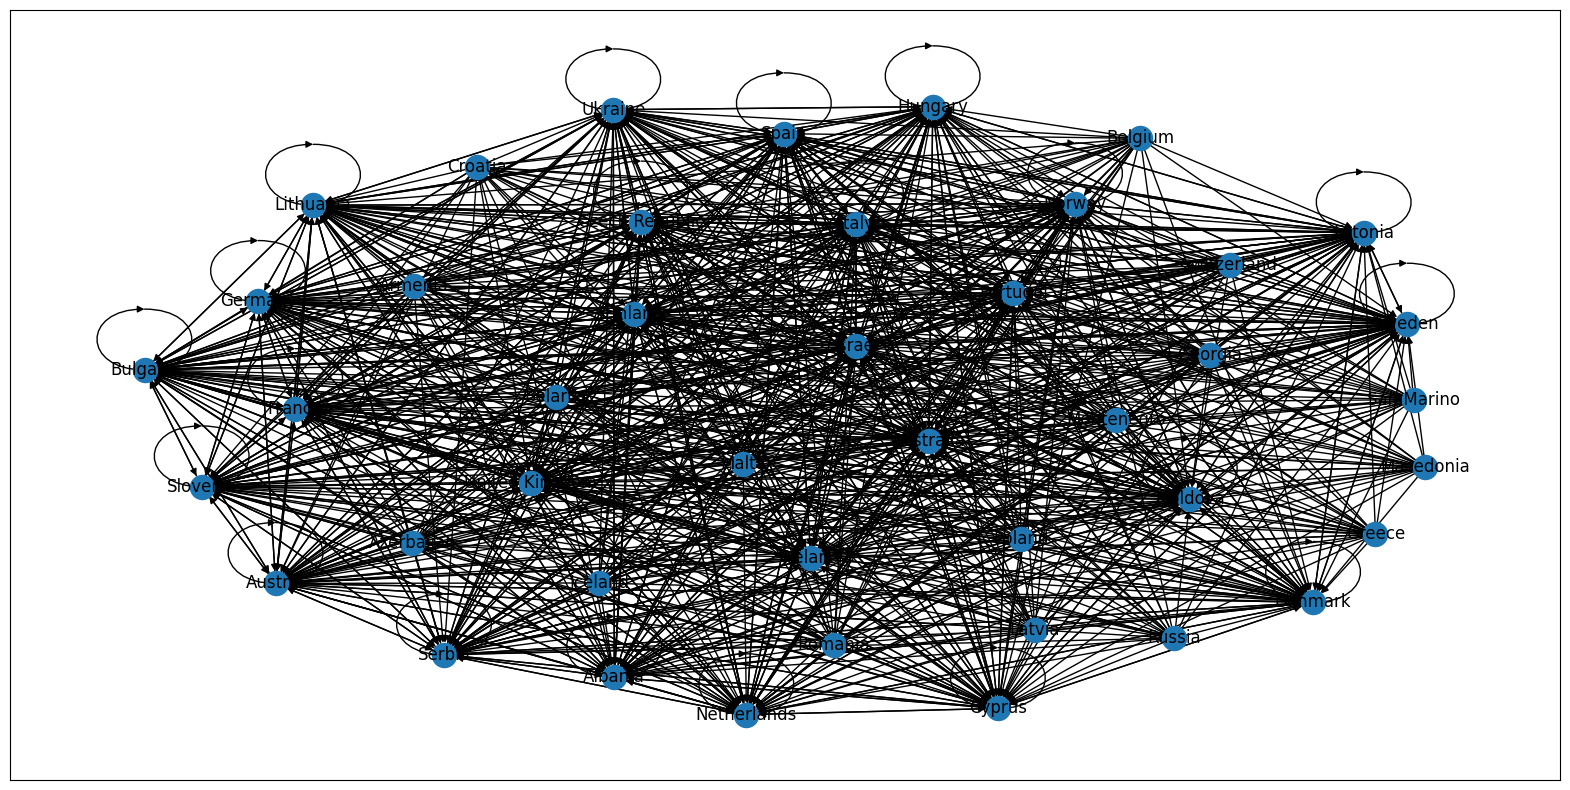

In [ ]:
nx.draw_networkx(G)

In [ ]:
G.out_degree(weight='points')

OutDegreeView({'Albania': 116, 'Israel': 116, 'Cyprus': 116, 'Austria': 116, 'Germany': 116, 'Italy': 116, 'Czech Republic': 116, 'Sweden': 116, 'Estonia': 116, 'Denmark': 116, 'Moldova': 116, 'Lithuania': 116, 'France': 116, 'Bulgaria': 116, 'Norway': 116, 'Ireland': 116, 'Ukraine': 116, 'Netherlands': 116, 'Serbia': 116, 'Australia': 116, 'Hungary': 116, 'Slovenia': 116, 'Spain': 116, 'United Kingdom': 116, 'Finland': 116, 'Portugal': 116, 'Belarus': 116, 'Belgium': 116, 'Croatia': 116, 'Macedonia': 116, 'Greece': 116, 'Iceland': 116, 'Latvia': 116, 'Malta': 116, 'Poland': 116, 'Romania': 116, 'Russia': 116, 'Switzerland': 116, 'Armenia': 116, 'Georgia': 116, 'Montenegro': 116, 'Azerbaijan': 116, 'San Marino': 116})

In [ ]:
Gsub = G.edge_subgraph([(e[0],e[1]) for e in G.edges(data=True) if e[2]['points']>0])
print(Gsub)

DiGraph with 43 nodes and 650 edges


(array([16.,  1.,  3.,  2.,  3.,  5.,  4.,  1.,  4.,  4.]),
 array([13. , 17.5, 22. , 26.5, 31. , 35.5, 40. , 44.5, 49. , 53.5, 58. ]),
 <BarContainer object of 10 artists>)

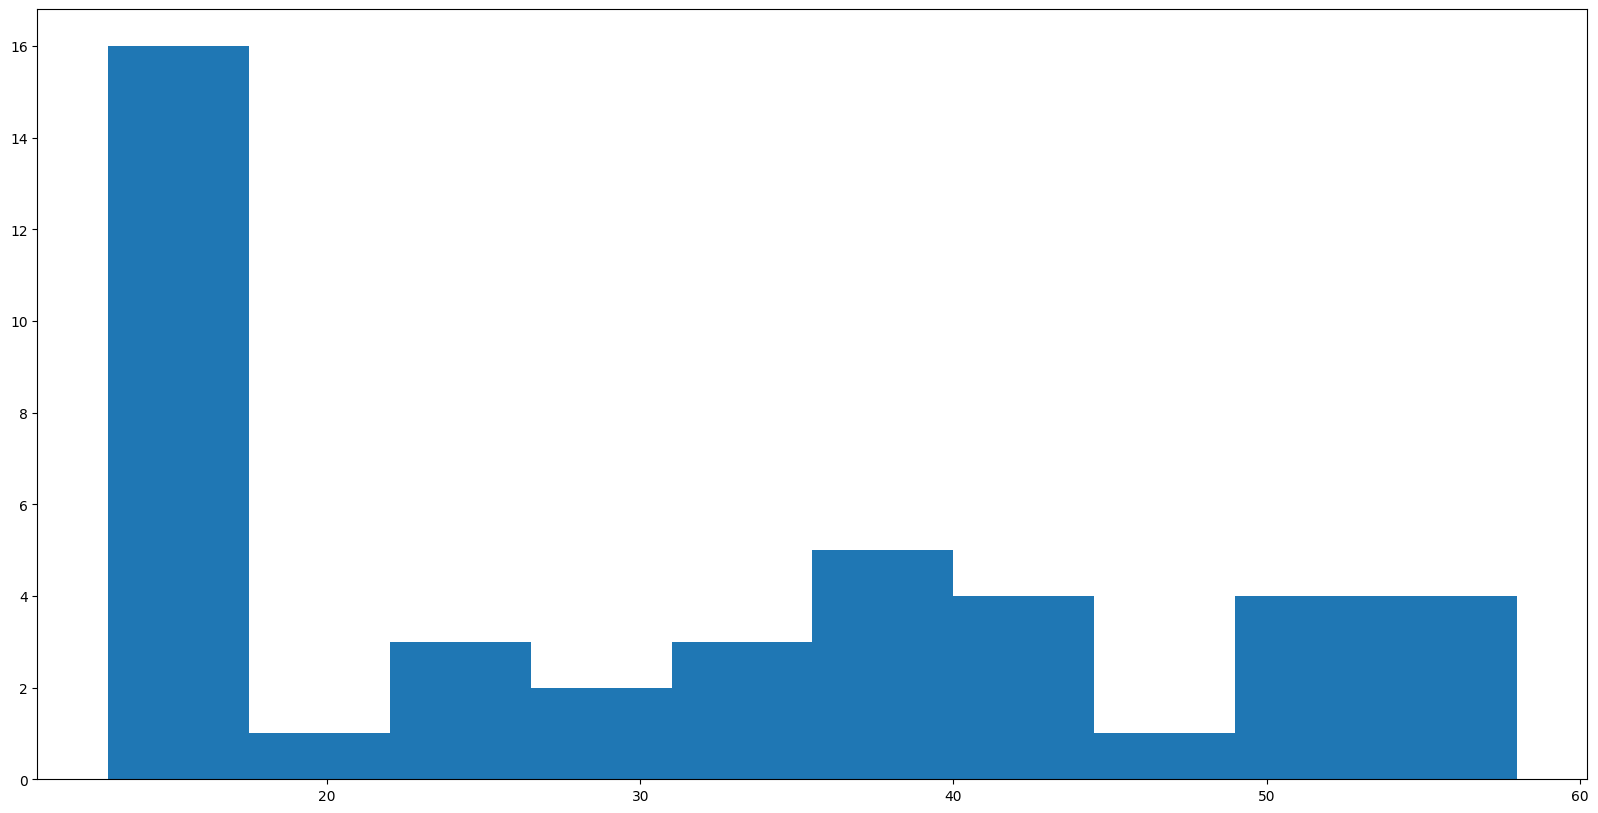

In [ ]:
plt.hist(dict(Gsub.degree()).values())

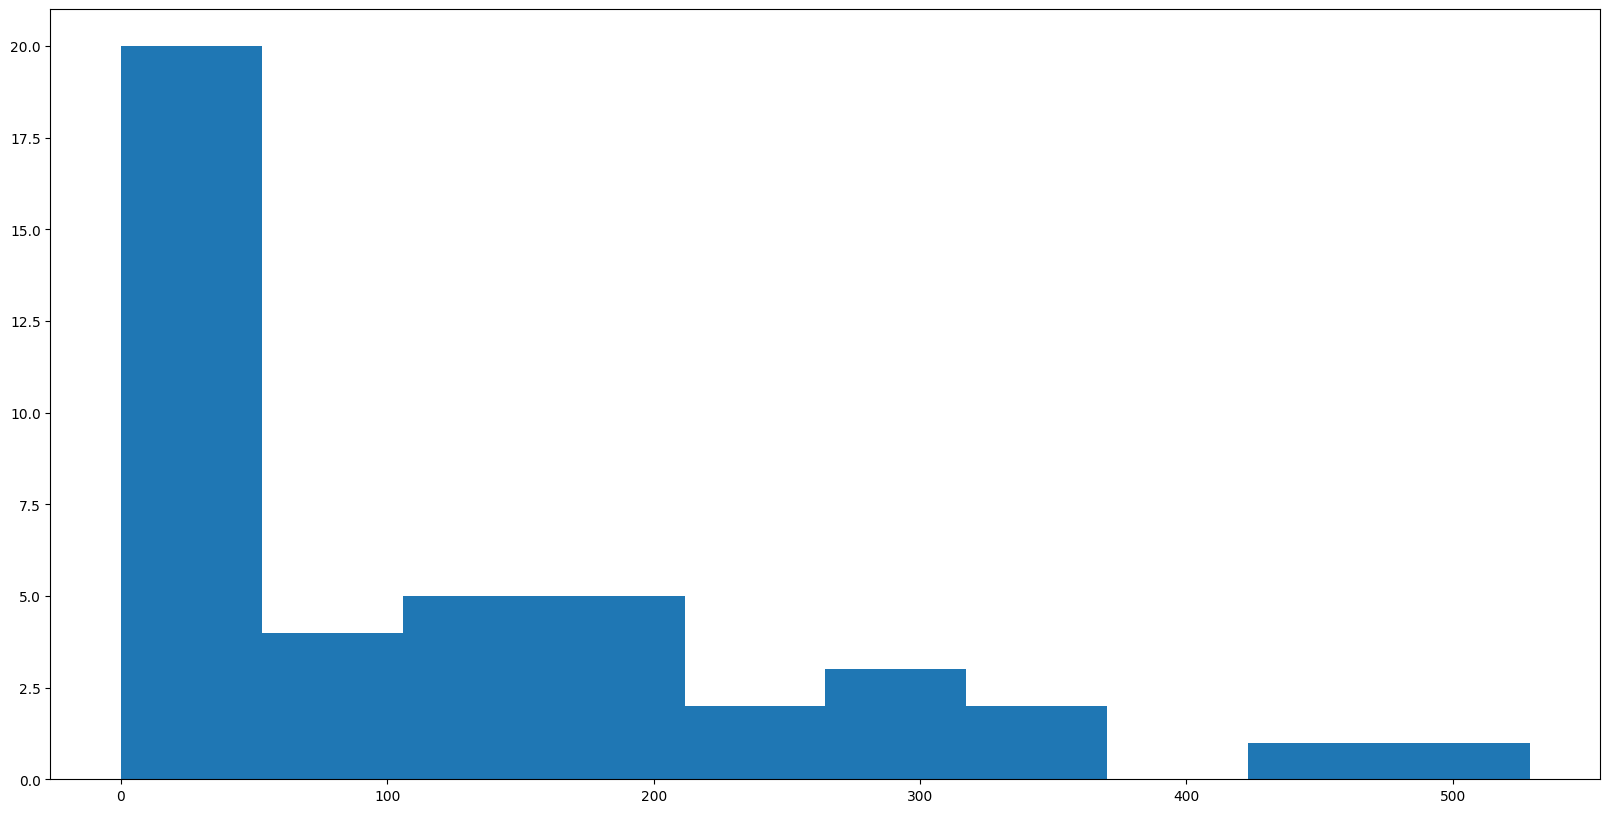

In [ ]:
h = plt.hist(dict(G.in_degree(weight='points')).values())

In [ ]:
deg_cen_points = dict(G.in_degree(weight='points'))
{k:deg_cen_points[k] for k in deg_cen_points if deg_cen_points[k]==max(deg_cen_points.values())}

{'Israel': 529}

In [ ]:
page_rank = dict(nx.pagerank(G,weight='points'))
{k:page_rank[k] for k in page_rank if page_rank[k]==max(page_rank.values())}

{'Israel': 0.09068767468630143}

In [ ]:
between = dict(nx.betweenness_centrality(G,weight='points'))
{k:between[k] for k in between if between[k]==max(between.values())}

{'Estonia': 46701.144689294066}